# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.optimizers import Adam

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1] #last one as target/layer -1 index #7000 for training
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1] #2000 data samples for validation
X_test, y_test = series[9000:, :n_steps], series[9000:, -1] #1000 data samples for testing

In [5]:
no_training_epochs = 5

### 1.3 Data examination

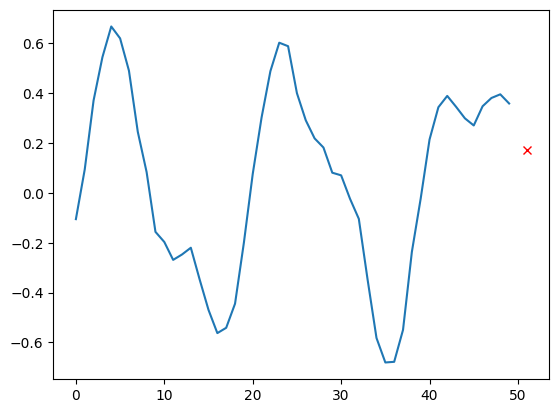

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.2027 - mean_squared_error: 0.2027 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0070 - val_mean_squared_error: 0.0070


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

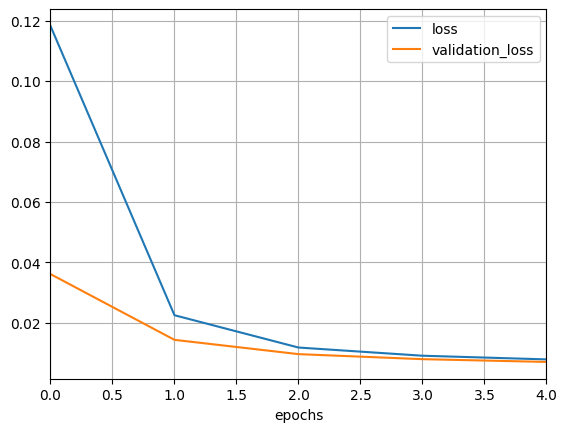

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.006986372638493776
Test MSE:  0.006986372638493776


### 1.5 Simple RNN Model

In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4232 - mean_squared_error: 0.4232 - val_loss: 0.3847 - val_mean_squared_error: 0.3847
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3568 - mean_squared_error: 0.3568 - val_loss: 0.3393 - val_mean_squared_error: 0.3393
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3227 - mean_squared_error: 0.3227 - val_loss: 0.2965 - val_mean_squared_error: 0.2965
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2810 - mean_squared_error: 0.2810 - val_loss: 0.2562 - val_mean_squared_error: 0.2562
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2445 - mean_squared_error: 0.2445 - val_loss: 0.2184 - val_mean_squared_error: 0.2184


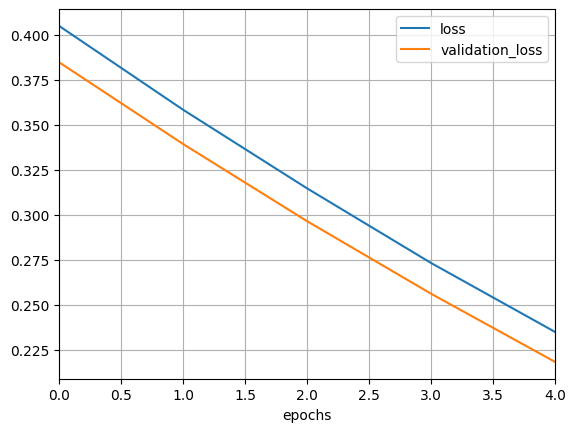

In [17]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True)) #has an memory
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1])) #output

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003584549529477954
Test MSE:  0.003584549529477954


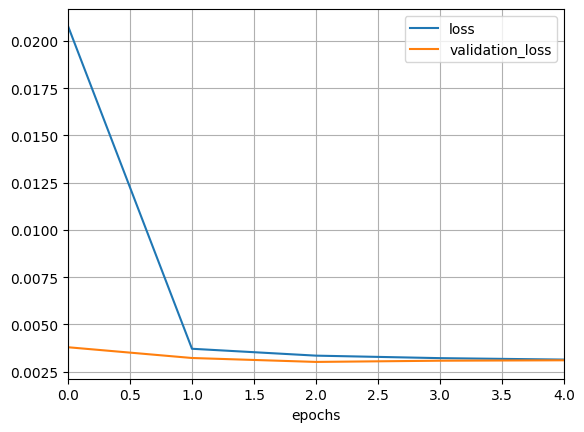

In [22]:
plot_function(history_deep_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.2 - Dataset examination

In [25]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [27]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [28]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [29]:
embed_size = 128
vocabulary_size = 1000

model_RNN = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model_RNN.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history_RNN = model_RNN.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.4980 - loss: 0.7223 - val_accuracy: 0.4938 - val_loss: 0.7006
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4984 - loss: 0.6971 - val_accuracy: 0.4938 - val_loss: 0.6940
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4986 - loss: 0.6953 - val_accuracy: 0.5062 - val_loss: 0.7027
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5046 - loss: 0.6958 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4935 - loss: 0.6959 - val_accuracy: 0.5062 - val_loss: 0.6938


TASK: Modify structure, change the core of the network from RNN to LSTM and GRU. Compare the results

In [30]:
#LSTM code
model_LSTM = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model_LSTM.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5057 - loss: 0.6955 - val_accuracy: 0.4938 - val_loss: 0.6968
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4971 - loss: 0.6947 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4965 - loss: 0.6940 - val_accuracy: 0.5062 - val_loss: 0.6935
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5063 - loss: 0.6936 - val_accuracy: 0.4940 - val_loss: 0.6979
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5315 - loss: 0.6789 - val_accuracy: 0.7844 - val_loss: 0.4672


In [31]:
#GRU code
model_GRU = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model_GRU.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_GRU = model_GRU.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5211 - loss: 0.6922 - val_accuracy: 0.5874 - val_loss: 0.6648
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7184 - loss: 0.5490 - val_accuracy: 0.8236 - val_loss: 0.3861
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8370 - loss: 0.3614 - val_accuracy: 0.8336 - val_loss: 0.3744
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8636 - loss: 0.3245 - val_accuracy: 0.8164 - val_loss: 0.3949
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8775 - loss: 0.2911 - val_accuracy: 0.8258 - val_loss: 0.3949


In [33]:
#comparison
score_RNN = model_RNN.evaluate(X_test, y_test, verbose=0)
print('RNN')
print('Test loss:', score_RNN[0])
print(f'Test accuracy: ', score_RNN[1]*100, "%")

score_LSTM = model_LSTM.evaluate(X_test, y_test, verbose=0)
print()
print('LSTM')
print('Test loss:', score_LSTM[0])
print(f'Test accuracy: ', score_LSTM[1]*100, "%")

score_GRU = model_GRU.evaluate(X_test, y_test, verbose=0)
print()
print('GRU')
print('Test loss:', score_GRU[0])
print(f'Test accuracy: ', score_GRU[1]*100, "%")


RNN
Test loss: 0.6944476366043091
Test accuracy:  50.0 %

LSTM
Test loss: 0.454129695892334
Test accuracy:  78.9359986782074 %

GRU
Test loss: 0.38375866413116455
Test accuracy:  83.20000171661377 %
